# Object Detection Using Faster R-CNN with MobileNetV3

### Step 1: Dataset Exploration and Clone github repository

#### Clone github repository

In [7]:
%cd /root/ass2/

/root/ass2


In [3]:
!git clone https://github.com/nabinsharmaUTS/ObjectDetection-FasterRCNN.git

Cloning into 'ObjectDetection-FasterRCNN'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 127 (delta 60), reused 123 (delta 58), pack-reused 0
Receiving objects: 100% (127/127), 4.26 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [8]:
# Enter the repo directory.
%cd ObjectDetection-FasterRCNN/

/root/ass2/ObjectDetection-FasterRCNN


In [9]:
# Install the Requirements
!pip install -r requirements.txt

  Using cached albumentations-1.4.4-py3-none-any.whl (150 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.6 MB)
  Using cached scikit_image-0.21.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.9 MB)
  Using cached torch-1.12.0-cp38-cp38-manylinux1_x86_64.whl (776.3 MB)
  Using cached torchvision-0.13.0-cp38-cp38-manylinux1_x86_64.whl (19.1 MB)
  Using cached protobuf-3.20.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached wandb-0.16.6-py3-none-any.whl (2.2 MB)
  Using cached tensorboard-2.14.0-py3-none-any.whl (5.5 MB)
  Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
  Using cached pycocotools-2.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (439 kB)
  Using cached setuptools-59.5.0-py3-none-any.whl (952 kB)
  Using cached torchmetrics-1.3.2-py3-none-any.whl (841 kB)
  Using cached numpy-1.24.4-cp38-cp

In [5]:
%cd /root/ass2/ObjectDetection-FasterRCNN/data/

/root/ass2/ObjectDetection-FasterRCNN/data


In [9]:
!pwd
!unzip /root/ass2/dataset_42028assg2_24673422.zip

/root/ass2/ObjectDetection-FasterRCNN/data
Archive:  /root/ass2/dataset_42028assg2_24673422.zip
   creating: Image_Classification/
   creating: Object_Detection/
   creating: Image_Classification/dataset_24673422/
   creating: Image_Classification/dataset_24673422/ANDEAN LAPWING/
   creating: Image_Classification/dataset_24673422/BEARDED REEDLING/
   creating: Image_Classification/dataset_24673422/Border_terrier/
   creating: Image_Classification/dataset_24673422/DAURIAN REDSTART/
   creating: Image_Classification/dataset_24673422/Dandie_Dinmont/
   creating: Image_Classification/dataset_24673422/GURNEYS PITTA/
   creating: Image_Classification/dataset_24673422/NOISY FRIARBIRD/
   creating: Image_Classification/dataset_24673422/NORTHERN BEARDLESS TYRANNULET/
   creating: Image_Classification/dataset_24673422/Norwegian_elkhound/
   creating: Image_Classification/dataset_24673422/Norwich_terrier/
   creating: Image_Classification/dataset_24673422/PINK ROBIN/
   creating: Image_Classifica

In [2]:
%cd /root/ass2/ObjectDetection-FasterRCNN/

/root/ass2/ObjectDetection-FasterRCNN


#### Dataset Exploration

In [3]:
from PIL import Image
import os

# Path to your dataset directory
dataset_path = 'data/Object_Detection/pascal/train'

# Collecting image dimensions
dimensions = []
for img_file in os.listdir(dataset_path):
    if img_file.endswith(('.jpg', '.png')):  # Check for common image file extensions
        with Image.open(os.path.join(dataset_path, img_file)) as img:
            dimensions.append(img.size)

# Analyze dimensions for diversity
unique_dimensions = set(dimensions)
print("Unique dimensions in the dataset:", unique_dimensions)


Unique dimensions in the dataset: {(1920, 1080)}


In [4]:
import os
import xml.etree.ElementTree as ET
from collections import defaultdict

def analyze_pascal_voc_format(folder_path):
    class_counts = defaultdict(int)
    total_annotations = 0

    # Iterate over annotation XML files
    for filename in os.listdir(folder_path):
        if not filename.endswith('.xml'):
            continue
        tree = ET.parse(os.path.join(folder_path, filename))
        root = tree.getroot()
        for member in root.findall('object'):
            class_counts[member.find('name').text] += 1
            total_annotations += 1

    return class_counts, total_annotations

# Example usage:
annotation_folder = 'data/Object_Detection/pascal/train'
class_counts, total_annotations = analyze_pascal_voc_format(annotation_folder)
print("Number of images per class:", class_counts)
print("Total number of annotations:", total_annotations)


Number of images per class: defaultdict(<class 'int'>, {'young': 4235, 'germination': 4421, 'pod': 2494, 'Ready': 1421, 'empty_pod': 1132})
Total number of annotations: 13703


### Step 2: Setup Training Configuration and Dataset paths

In [2]:
%cd /root/ass2/ObjectDetection-FasterRCNN/

/root/ass2/ObjectDetection-FasterRCNN


In [4]:
%%writefile data_configs/custom_data.yaml
# Images and labels directory should be relative to train.py
TRAIN_DIR_IMAGES: 'data/Object_Detection/pascal/train'
TRAIN_DIR_LABELS: 'data/Object_Detection/pascal/train'
VALID_DIR_IMAGES: 'data/Object_Detection/pascal/valid'
VALID_DIR_LABELS: 'data/Object_Detection/pascal/valid'
TEST_DIR_IMAGES: 'data/Object_Detection/pascal/test'
TEST_DIR_LABELS: 'data/Object_Detection/pascal/test'

# Class names.
CLASSES: [
    '__background__',
    'Ready',
    'empty_pod',
    'germination',
    'pod',
    'young'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 6

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

# Data augmentation configuration
AUGMENTATIONS: [
    {
        "name": "HorizontalFlip",
        "parameters": {
            "p": 0.5
        }
    },
    {
        "name": "VerticalFlip",
        "parameters": {
            "p": 0.5
        }
    },
    {
        "name": "RandomRotate90",
        "parameters": {
            "p": 0.5
        }
    },
    {
        "name": "RandomBrightnessContrast",
        "parameters": {
            "brightness_limit": 0.2,
            "contrast_limit": 0.2,
            "p": 0.5
        }
    }
]

# Hyperparameters for model training
LEARNING_RATE: 0.0025
WEIGHT_DECAY: 0.0005
LEARNING_MOMENTUM: 0.9
STEP_LR_SIZES: [8, 16, 24]
STEP_LR_GAMMA: 0.1
WARMUP_FACTOR: 0.1
WARMUP_ITERS: 1000

# Model training configurations
IMAGES_PER_BATCH: 2
BASE_LR: 0.0025
MAX_ITER: 18000


Overwriting data_configs/custom_data.yaml


In [6]:
!wandb disabled

W&B disabled.


### Step 3: Start Training

In [7]:
!python train.py --config data_configs/custom_data.yaml --epochs 150 --model fasterrcnn_mobilenetv3_large_fpn --project-name lettuce_pascal_mobilenetv3 --batch-size 2 --no-mosaic

Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1057
Number of validation samples: 226

Building model from scratch...
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Layer (type:depth-idx)                                  Output Shape              Param #
FasterRCNN                                              [0, 4]                    --
├─Generali

#### Display result images on train set

In [13]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [14]:
%matplotlib inline

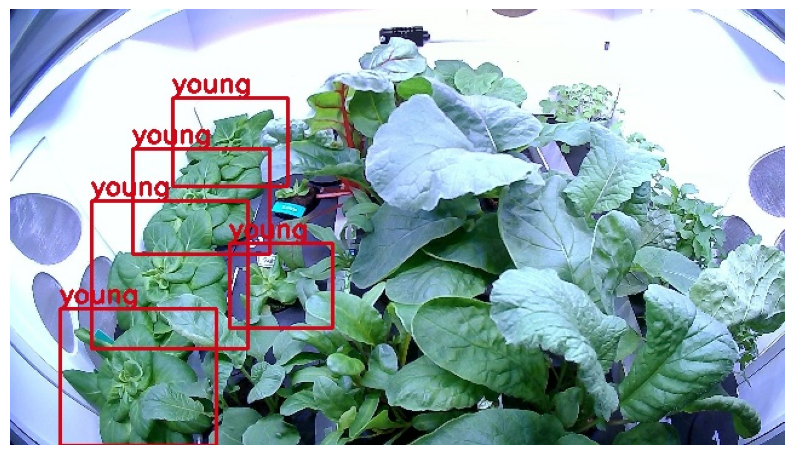

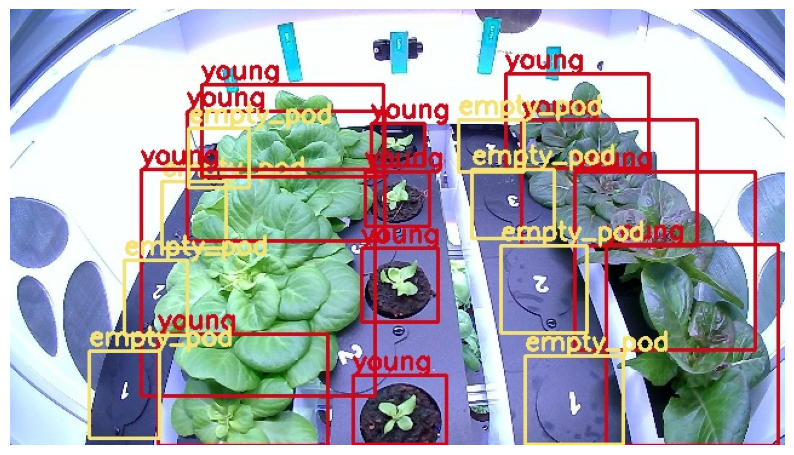

In [19]:
results_dir_path = '/root/ass2/ObjectDetection-FasterRCNN/outputs/training/lettuce_pascal_mobilenetv3/'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Step 4: Performance on val and test set

#### Val set

In [20]:
# No verbose mAP.
!python eval.py --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_mobilenetv3_large_fpn

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|███████████████████████████████████████████| 29/29 [00:07<00:00,  4.03it/s]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.6552),
 'map_50': tensor(0.9369),
 'map_75': tensor(0.8074),
 'map_large': tensor(0.4345),
 'map_medium': tensor(0.6254),
 'map_per_class': tensor(-1.),
 'map_small': tensor(0.5106),
 'mar_

In [21]:
# Verbose mAP.
!python eval.py --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_mobilenetv3_large_fpn --verbose

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|███████████████████████████████████████████| 29/29 [00:07<00:00,  4.05it/s]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.6552),
 'map_50': tensor(0.9369),
 'map_75': tensor(0.8074),
 'map_large': tensor(0.4345),
 'map_medium': tensor(0.6254),
 'map_per_class': tensor([0.4977, 0.6791, 0.7031, 0.7416, 0.6542]),

#### Test set

In [10]:
# Verbose mAP.
!python eval.py --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_mobilenetv3_large_fpn --verbose

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|███████████████████████████████████████████| 29/29 [00:07<00:00,  4.01it/s]


{'classes': tensor([1, 2, 3, 4, 5], dtype=torch.int32),
 'map': tensor(0.6542),
 'map_50': tensor(0.9299),
 'map_75': tensor(0.8104),
 'map_large': tensor(0.5481),
 'map_medium': tensor(0.6400),
 'map_per_class': tensor([0.4956, 0.6879, 0.7141, 0.7320, 0.6413]),

### Step 5: Inference on train and test sample images

In [22]:
!python inference.py --input data/Object_Detection/pascal/train/100130.jpg --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth

Building from model name arguments...
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "inference.py", line 211, in <module>
    main(args)
  File "inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/ope

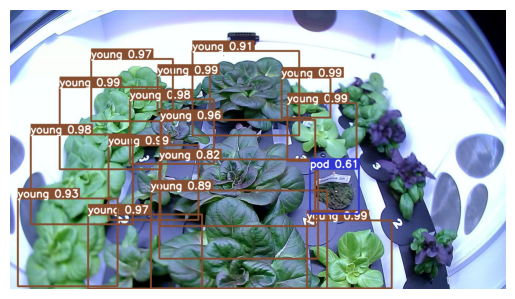

In [23]:
image = plt.imread('/root/ass2/ObjectDetection-FasterRCNN/outputs/inference/res_2/100130.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
!python inference.py --input data/Object_Detection/pascal/test/100004.jpg --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth
!python inference.py --input data/Object_Detection/pascal/test/100033.jpg --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth
!python inference.py --input data/Object_Detection/pascal/test/100131.jpg --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth
!python inference.py --input data/Object_Detection/pascal/test/100171.jpg --weights outputs/training/lettuce_pascal_mobilenetv3/best_model.pth

Building from model name arguments...
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Traceback (most recent call last):
  File "inference.py", line 211, in <module>
    main(args)
  File "inference.py", line 204, in main
    cv2.destroyAllWindows()
cv2.error: OpenCV(4.9.0) /io/ope

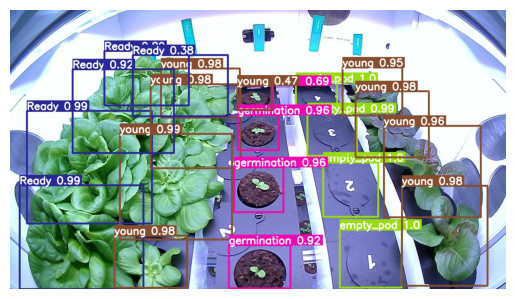

In [15]:
image = plt.imread('/root/ass2/ObjectDetection-FasterRCNN/outputs/inference/res_3/100004.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

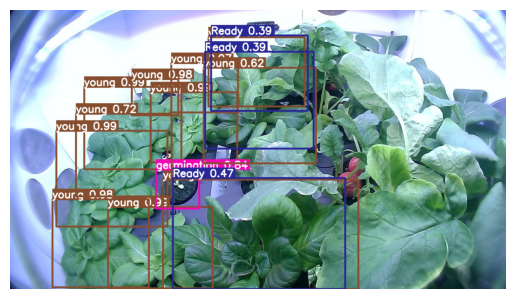

In [16]:
image = plt.imread('/root/ass2/ObjectDetection-FasterRCNN/outputs/inference/res_4/100033.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

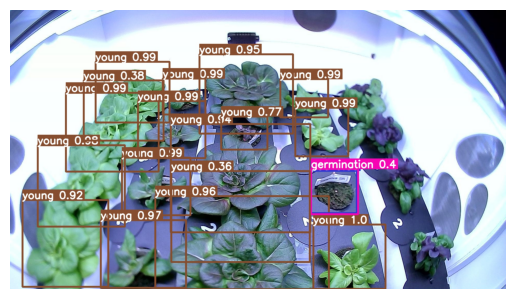

In [17]:
image = plt.imread('/root/ass2/ObjectDetection-FasterRCNN/outputs/inference/res_5/100131.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

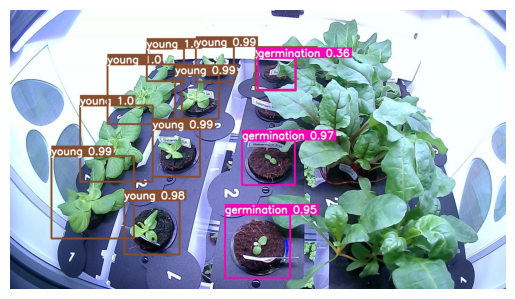

In [18]:
image = plt.imread('/root/ass2/ObjectDetection-FasterRCNN/outputs/inference/res_6/100171.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()